# HW Supervised Learning Classification

### Agi Rahmawandi <br> Batch 57

## Telecommunication Customers Churn Prediction

### melakukan prediksi apakah suatu customer akan churn atau tidak.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


In [2]:
df = pd.read_csv("dataset/Telecom_Customers_Churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


## Exploratory Data Analysis (EDA)

### **Definisi masing-masing kolom**<br>
● Customerid: id dari customer<br>
● Gender: gender dari customer<br>
● Seniorcitizen: apakah merupakan senior citizen atau tidak<br>
● Partner: apakah memiliki partner atau tidak<br>
● Dependents: apakah memiliki tanggungan atau tidak seperti anak dll<br>
● Tenure: tenure dari langganan customer<br>
● PhoneService: apakah menggunakan layanan phone atau tidak<br>
● MultipleLines: apakah menggunakan multiple lines atau tidak<br>
● InternetService: Tipe dari internet service yang digunakan<br>
● OnlineSecurity: apakah menggunakan fitur online security<br>
● OnlineBackup: apakah menggunakan fitur online backup<br>
● DeviceProtection: apakah menggunakan fitur device protection<br>
● TechSupport: apakah menggunakan fitur tech support atau tidak<br>
● StreamingTV: apakah menggunakan fitur streaming TV atau tidak<br>
● StreamingMovies: apakah menggunakan fiture streaming film atau tidak<br>
● Contract: tipe contract dari customer<br>
● PaperlessBilling: apakah menggunakan fitur paperless billing atau tidak<br>
● PaymentMethod: payment tipe yang digunakan oleh customer<br>
● MonthlyCharges: total charges/biaya bulanan yang dibayarkan<br>
● TotalCharges: total charges secara keseluruhan yang dibayarkan<br>
● Churn: target variabel yang menunjukan bahwa customer churn atau tidak<br>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 1. Berapa banyak perbandingan pelanggan yang melakukan churn dibanding tidak melakukan churn ?

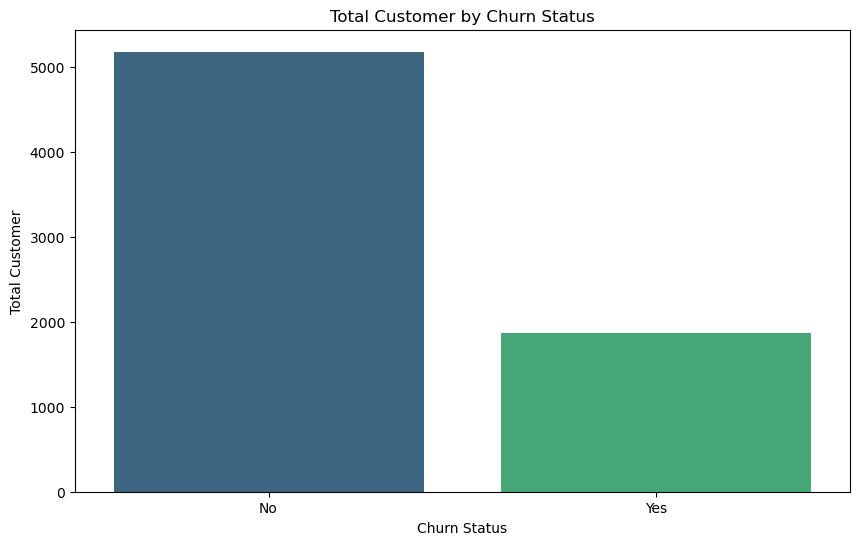

In [4]:
total_id = df.groupby('Churn')['customerID'].nunique().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='customerID', data=total_id,hue='Churn', palette='viridis')
plt.title('Total Customer by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Customer')
plt.xticks(rotation=0)
plt.show()

### 2. Apakah besarnya MonthlyCharge mempengaruhi pelanggan yang churn ?

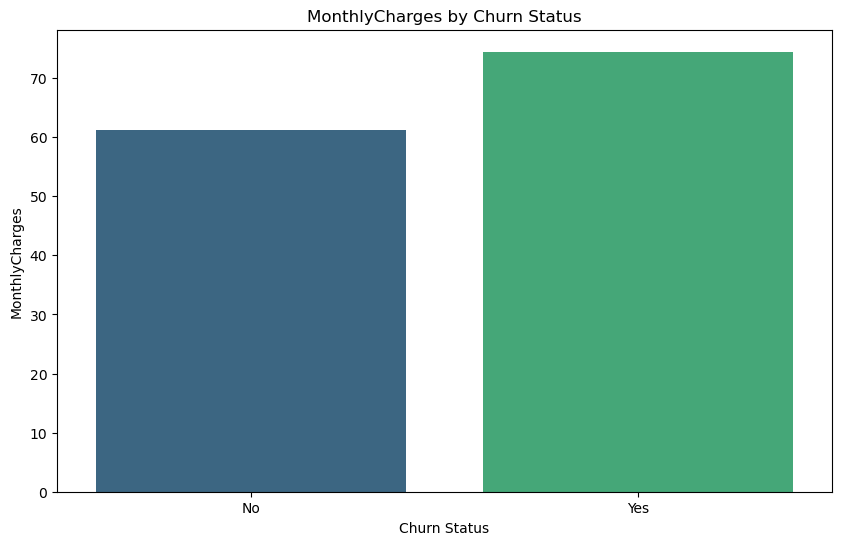

In [5]:
total = df.groupby('Churn')['MonthlyCharges'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='MonthlyCharges', data=total,hue='Churn', palette='viridis')
plt.title('MonthlyCharges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('MonthlyCharges')
plt.xticks(rotation=0)
plt.show()

### 3. Apakah ada perbedaan tingkat churn antara pelanggan senior citizen dan non-senior citizen?

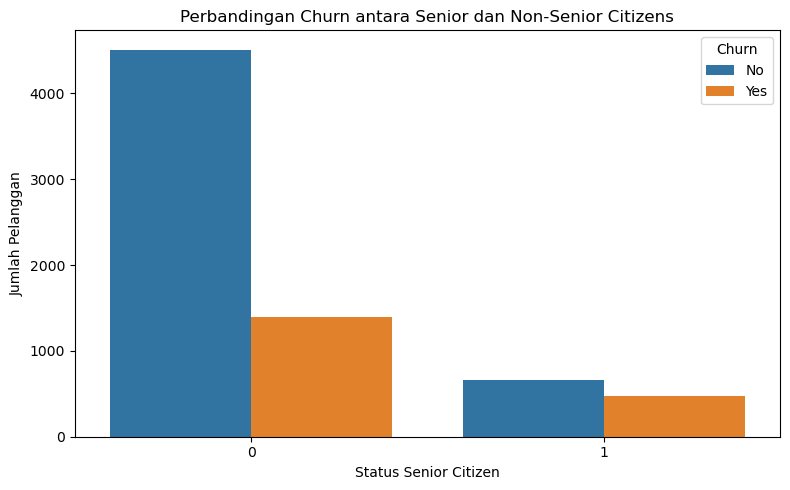

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title('Perbandingan Churn antara Senior dan Non-Senior Citizens')
plt.xlabel('Status Senior Citizen')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### 4. Apakah tingkat tenure mempengaruhi tingkat churn ?

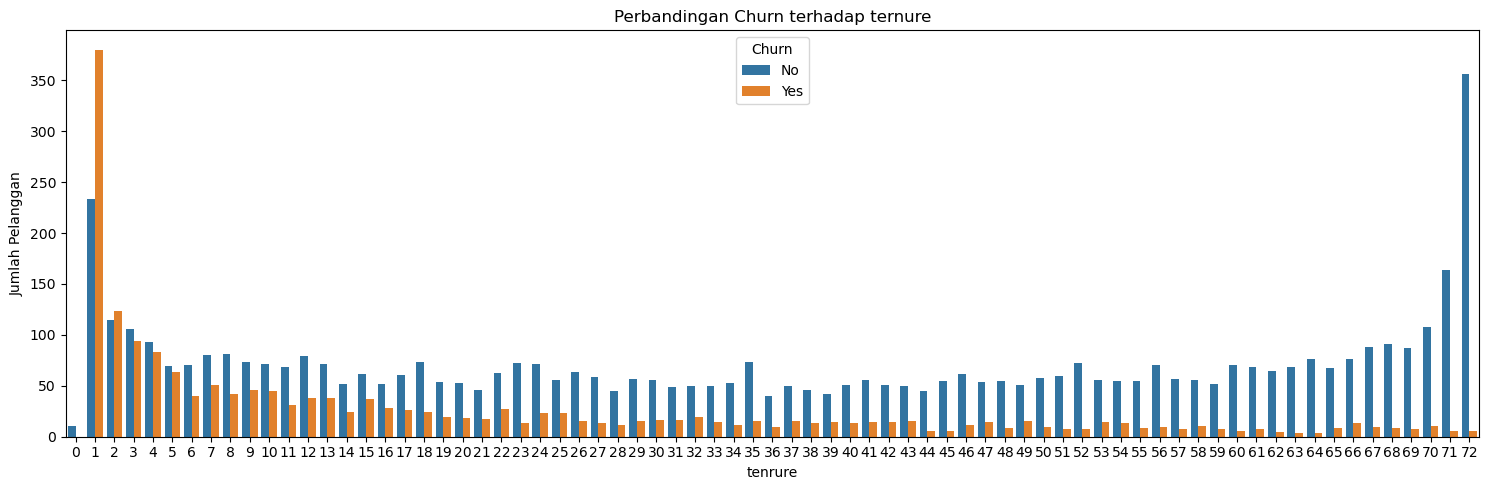

In [7]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='tenure', hue='Churn')
plt.title('Perbandingan Churn terhadap ternure')
plt.xlabel('tenrure')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

### 5. Apakah ada perbedaan tingkat churn antara pelanggan yang menggunakan Internet Service Fiber Optic, DSL  , dan yang tidak memakan internet service?

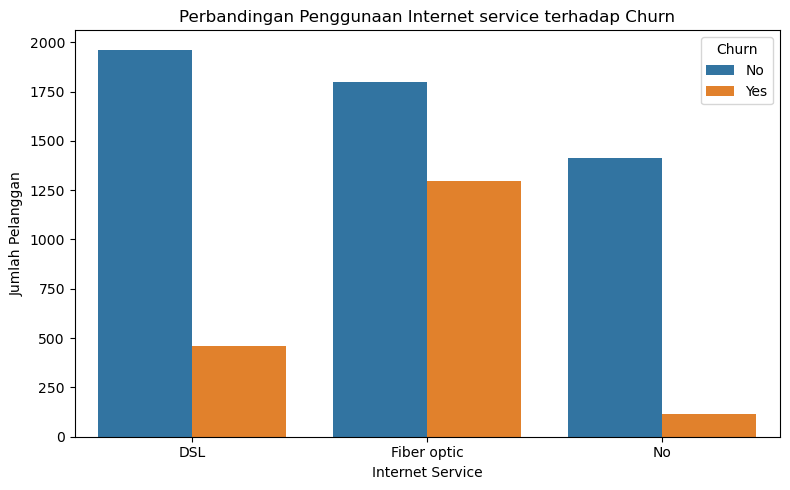

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Perbandingan Penggunaan Internet service terhadap Churn')
plt.xlabel('Internet Service')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [9]:
df[['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       1962
Fiber optic      No       1799
No               No       1413
Fiber optic      Yes      1297
DSL              Yes       459
No               Yes       113
Name: count, dtype: int64

### 6. Apakah perbedaan tingkat kontak memperngaruhi tingkat churn ?

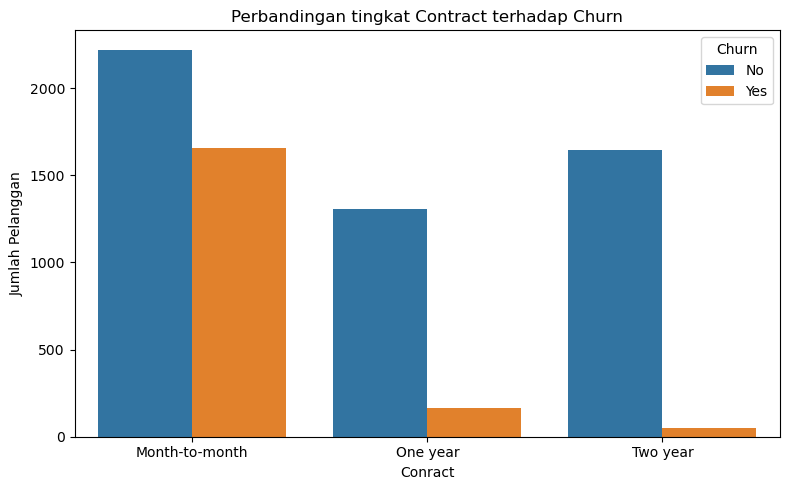

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Perbandingan tingkat Contract terhadap Churn')
plt.xlabel('Conract')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

In [11]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

### 7.Apakah payment methiod mempengaruhi tingkat churn ?

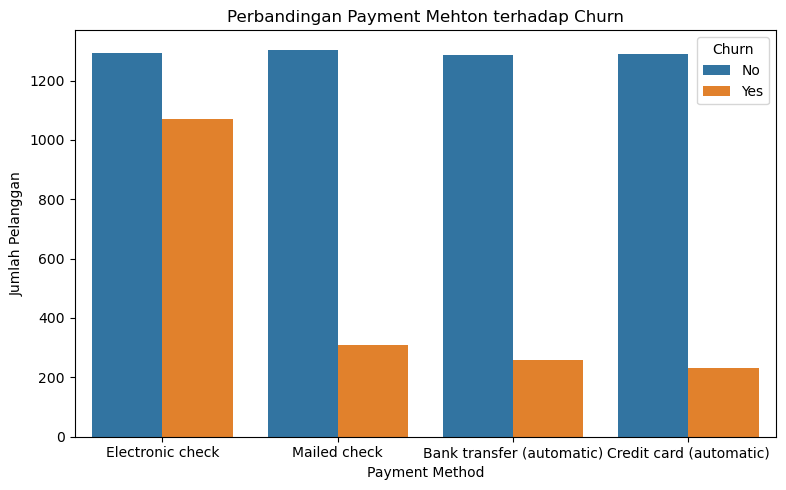

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Perbandingan Payment Mehton terhadap Churn')
plt.xlabel('Payment Method')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

## Descriptive Statistics

In [13]:
numeric_col= df.select_dtypes(include=['int64','float64']).columns
object_col = df.select_dtypes(include=['object']).columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [16]:
df[object_col].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Univariate analysis

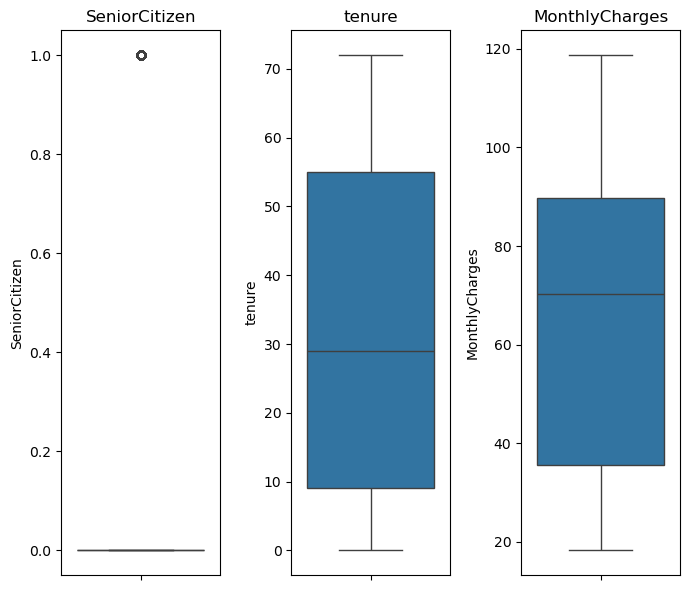

In [17]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_col)/3)), ncols=3, figsize=(7, 6))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [42]:
excluded = ['customerID', 'TotalCharges']
cat_cols = [col for col in df.select_dtypes(include='object').columns if col not in excluded]

# Tampilkan distribusi nilai dan visualisasi untuk setiap kolom kategorikal
for col in cat_cols:
    print(f"\n📊 Distribusi kolom: {col}")
    print(df[col].value_counts())
    print("\nPersentase:")
    print((df[col].value_counts(normalize=True) * 100).round(2))

    # # Visualisasi countplot
    # plt.figure(figsize=(8, 4))
    # sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    # plt.title(f"Distribusi: {col}")
    # plt.xticks(rotation=45, ha='right')
    # plt.tight_layout()
    # plt.show()


📊 Distribusi kolom: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Persentase:
gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64

📊 Distribusi kolom: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Persentase:
Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64

📊 Distribusi kolom: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Persentase:
Dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64

📊 Distribusi kolom: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Persentase:
PhoneService
Yes    90.32
No      9.68
Name: proportion, dtype: float64

📊 Distribusi kolom: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Persentase:
MultipleLines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: proportion, dtype: float64

📊 Distribusi

## Multivariate analysis


Korelasi (Cramér's V) terhadap Churn:

                  CramersV
Churn               0.9996
Contract            0.4098
OnlineSecurity      0.3470
TechSupport         0.3425
InternetService     0.3220
PaymentMethod       0.3027
OnlineBackup        0.2919
DeviceProtection    0.2811
StreamingMovies     0.2304
StreamingTV         0.2299
PaperlessBilling    0.1911
Dependents          0.1634
Partner             0.1497
MultipleLines       0.0364
gender              0.0000
PhoneService        0.0000
TotalCharges        0.0000


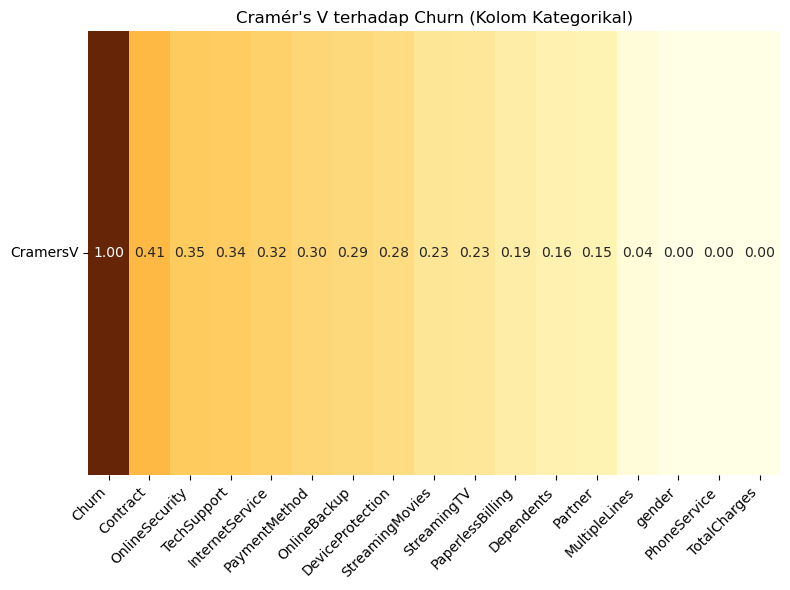

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan churn dan kolom kategorikal bertipe object
df['Churn'] = df['Churn'].astype(str)

# Fungsi Cramér's V dengan bias correction
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2 / (n-1))
    kcorr = k - ((k-1)**2 / (n-1))
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Ambil kolom kategorikal (object)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Hapus customerID karena itu ID unik
cat_cols = [col for col in cat_cols if col != 'customerID']

# Hitung Cramér’s V antara setiap kolom kategorikal dan Churn
cramers_results = {}
for col in cat_cols:
    value = cramers_v(df[col], df['Churn'])
    cramers_results[col] = round(value, 4)

# Convert ke DataFrame
cramer_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['CramersV'])
cramer_df = cramer_df.sort_values('CramersV', ascending=False)

# Tampilkan hasil
print("\nKorelasi (Cramér's V) terhadap Churn:\n")
print(cramer_df)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramer_df.T, annot=True, cmap='YlOrBr', fmt=".2f", cbar=False)
plt.title("Cramér's V terhadap Churn (Kolom Kategorikal)")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


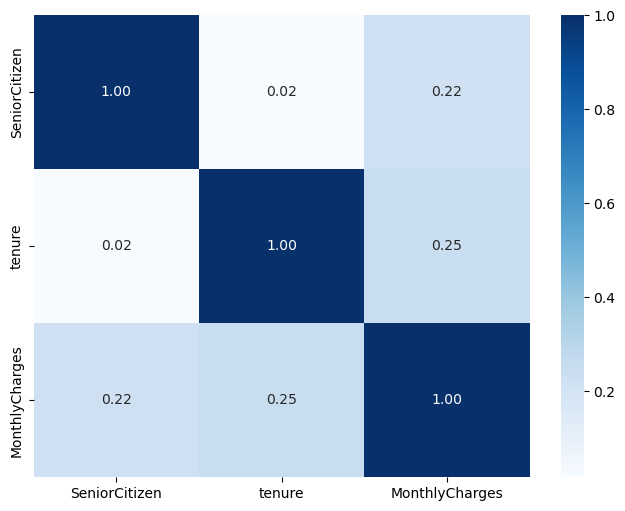

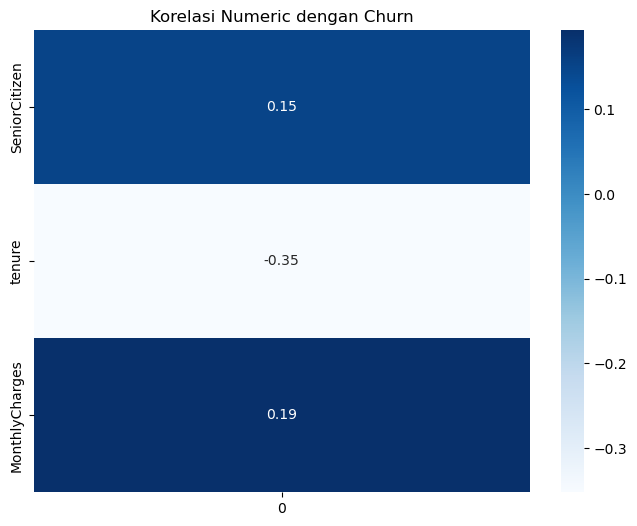

In [ ]:
#korelasi antar numeric
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_col].corr(), cmap='Blues', annot=True, fmt='.2f')



#heatmat dengan churn
plt.figure(figsize=(8, 6))
correlation_data = df[numeric_col].corrwith(df['Churn'].map({'Yes': 1, 'No': 0})).to_frame()
sns.heatmap(correlation_data, cmap='Blues', annot=True, fmt='.2f')
plt.title('Korelasi Numeric dengan Churn')
plt.show()


## Data Cleaning

### Handle Missing Value

In [21]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tidak ada missing vallue pada dataset ini

### Handle duplicate data

In [22]:
# Tampilkan semua baris yang terlibat dalam duplikasi
df_cleaned.duplicated().sum()

np.int64(0)

Tidak ada duplicate data pada dataset ini

## Penyesuaian Typedata

In [23]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:

# Bersihkan spasi di semua kolom object
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].str.strip()

# Konversi TotalCharges ke numeric
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

# Isi NaN dengan median secara aman
df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].fillna(df_cleaned['TotalCharges'].median())

# --- Gabungkan 'No phone service' menjadi 'No' pada MultipleLines ---
df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].replace({'No phone service': 'No'})

# --- Gabungkan 'No internet service' menjadi 'No' pada kolom terkait ---
internet_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in internet_cols:
    df_cleaned[col] = df_cleaned[col].replace({'No internet service': 'No'})

# --- Mapping Yes/No menjadi 1/0 ---
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines'
] + internet_cols

for col in binary_cols:
    df_cleaned[col] = df_cleaned[col].map({'Yes': 1, 'No': 0})




In [25]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [26]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df_cleaned.isna().sum()  # Pastikan tidak ada NaN

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Feature Engineering

### Feature Selection

In [28]:
# --- Hapus kolom customerID ---
df_cleaned.drop(['customerID'], axis=1, inplace=True)

### Feature Encoding

In [29]:

# --- Encode kolom kategorik lainnya dengan One-Hot Encoding ---
multi_class_cols = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
df_cleaned = pd.get_dummies(df_cleaned, columns=multi_class_cols, drop_first=True)

In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   MultipleLines                          7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   OnlineBackup                           7043 non-null   int64  
 8   DeviceProtection                       7043 non-null   int64  
 9   TechSupport                            7043 non-null   int64  
 10  StreamingTV                            7043 non-null   int64  
 11  Stre

In [31]:
df_cleaned.isnull().sum()


SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

In [32]:
df_cleaned.duplicated().sum()

np.int64(22)

In [33]:
df_cleaned.drop_duplicates(inplace=True)


### Prepare data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

#Feature scaling untuk numerik
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

#Split fitur dan target
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data siap untuk modeling. Jumlah fitur:", X_train.shape[1])



Data siap untuk modeling. Jumlah fitur: 23


In [35]:
#Handling Imbalace
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 8. Cek distribusi target sebelum dan sesudah
print("Sebelum SMOTE:\n", y_train.value_counts(normalize=True))
print("\nSesudah SMOTE:\n", pd.Series(y_train_bal).value_counts(normalize=True))

Sebelum SMOTE:
 Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64

Sesudah SMOTE:
 Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


## MODELING

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier



In [37]:
#Funcvtion to evaluate classification model

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.model_selection import cross_validate



def eval_classification(model, X_train_used, y_train_used, model_name="Model"):
    best_model = model.best_estimator_ if hasattr(model, "best_estimator_") else model

    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train_used)
    y_pred_proba = best_model.predict_proba(X_test)
    y_pred_proba_train = best_model.predict_proba(X_train_used)

    print("="*40)
    print(f"Evaluation Report for: {model_name}")
    print("="*40)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train_used, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_used, y_pred_proba_train[:, 1]))

    score = cross_validate(best_model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train): %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test):  %.2f' % score['test_score'].mean())
    print()


def show_feature_importance(model, feature_names, model_name="Model", top_n=25):
    best_model = model.best_estimator_ if hasattr(model, "best_estimator_") else model
    if not hasattr(best_model, "coef_"):
        print("Model does not support coef_ (not linear model).")
        return

    coef = best_model.coef_.ravel()
    coef_series = pd.Series(coef, index=feature_names)
    top_features = coef_series.abs().nlargest(top_n).index
    top_coef = coef_series[top_features].sort_values()

    ax = top_coef.plot(kind='barh', figsize=(10, 8))
    plt.xlabel("Coefficient Value")
    plt.title(f"Feature Importance -{model_name}")
    plt.tight_layout()
    plt.show()


def show_tree_feature_importance(model, feature_names,model_name="Model", top_n=25):
    best_model = model.best_estimator_ if hasattr(model, "best_estimator_") else model
    if not hasattr(best_model, "feature_importances_"):
        print("Model does not support feature_importances_.")
        return

    importances = pd.Series(best_model.feature_importances_, index=feature_names)
    top_features = importances.sort_values(ascending=False).head(top_n)

    ax = top_features.plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel("Importance Score")
    plt.title(f"Feature Importance - {model_name}")
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, model_name="Model"):
    from sklearn.metrics import ConfusionMatrixDisplay

    best_model = model.best_estimator_ if hasattr(model, "best_estimator_") else model
    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

def plot_roc_curve(model, model_name="Model"):
    best_model = model.best_estimator_ if hasattr(model, "best_estimator_") else model
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def show_best_hyperparameter(model):
    if hasattr(model, "best_estimator_"):
        print("Best Hyperparameters:\n")
        best_params = model.best_estimator_.get_params()
        for param, value in best_params.items():
            print(f"{param}: {value}")
    else:
        print("Model is not from tuning search (e.g. RandomizedSearchCV).")



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(eval_metric='logloss', random_state=42))
]

for name, model in models:
    
    model.fit(X_train_bal, y_train_bal)
    eval_classification(model, X_train_bal, y_train_bal, model_name=name)
    # plot_confusion_matrix(model, model_name=nam

Evaluation Report for: Logistic Regression
Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.80
Precision (Test Set): 0.53
Recall (Test Set): 0.71
F1-Score (Test Set): 0.61
roc_auc (test-proba): 0.83
roc_auc (train-proba): 0.88
Recall (Crossval Train): 0.55
Recall (Crossval Test):  0.55

Evaluation Report for: Random Forest
Accuracy (Test Set): 0.76
Accuracy (Train Set): 1.00
Precision (Test Set): 0.55
Recall (Test Set): 0.57
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.81
roc_auc (train-proba): 1.00
Recall (Crossval Train): 1.00
Recall (Crossval Test):  0.49

Evaluation Report for: Gradient Boosting
Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.82
Precision (Test Set): 0.54
Recall (Test Set): 0.73
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.84
roc_auc (train-proba): 0.90
Recall (Crossval Train): 0.57
Recall (Crossval Test):  0.53

Evaluation Report for: XGBoost
Accuracy (Test Set): 0.77
Accuracy (Train Set): 0.95
Precision (Test Set): 0.55
Recall (Test Set): 0.62
F1-Sco

### Hyperparameter Tuning

#### GradientBoosting

In [39]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 3, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'max_features': ['sqrt', 'log2', None]
# }
# gb_model = GradientBoostingClassifier(random_state=42)

# rs_gb = RandomizedSearchCV(
#     estimator=gb_model,
#     param_distributions=param_grid,
#     n_iter=50,  # bisa disesuaikan
#     scoring='roc_auc',
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# rs_gb.fit(X_train, y_train)

# eval_classification(rs_gb,X_train, y_train,model_name="Gradient Boosting (Tuned)")
# # plot_confusion_matrix(rs_gb, model_name="Gradient Boosting (Tuned)")
# # plot_roc_curve(rs_gb, model_name="Gradient Boosting (Tuned)")
# # show_tree_feature_importance(rs_gb.best_estimator_, X.columns, model_name="Gradient Boosting (Tuned)")
# # show_best_hyperparameter(rs_gb)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, f1_score

# 1. Parameter grid yang lebih sempit & realistis
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', None]
}

# 2. Model dasar
gb_model = GradientBoostingClassifier(random_state=42)

# 3. Cross-validation stratifikasi (penting untuk data imbalance/balance)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Randomized Search dengan scoring fokus ke 'recall' atau 'f1'
rs_gb = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=30,  # cukup untuk awal, bisa ditambah
    scoring='f1',  # atau 'recall' jika recall lebih penting
    cv=skf,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 5. Fitting ke data yang sudah di-balance
rs_gb.fit(X_train_bal, y_train_bal)

# 6. Evaluasi hasilnya
eval_classification(
    rs_gb,
    X_train_bal,
    y_train_bal,
    model_name="Gradient Boosting (Tuned)"
)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Evaluation Report for: Gradient Boosting (Tuned)
Accuracy (Test Set): 0.76
Accuracy (Train Set): 0.90
Precision (Test Set): 0.54
Recall (Test Set): 0.61
F1-Score (Test Set): 0.57
roc_auc (test-proba): 0.82
roc_auc (train-proba): 0.97
Recall (Crossval Train): 0.77
Recall (Crossval Test):  0.50



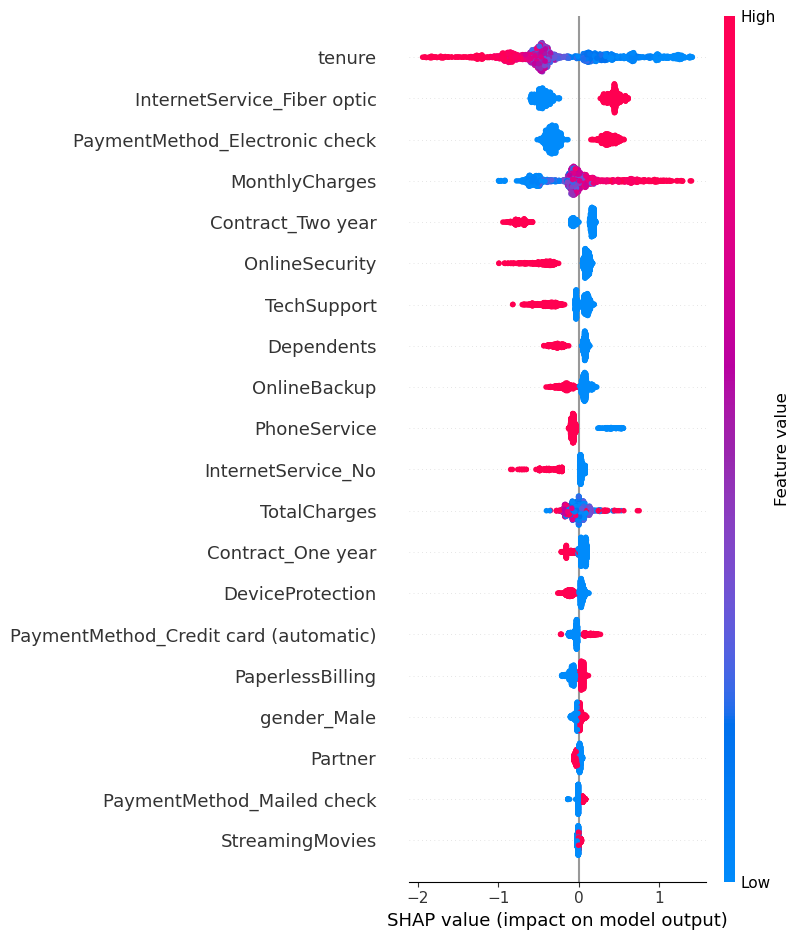

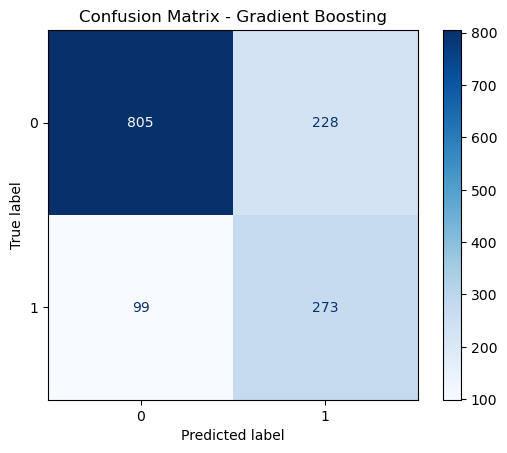

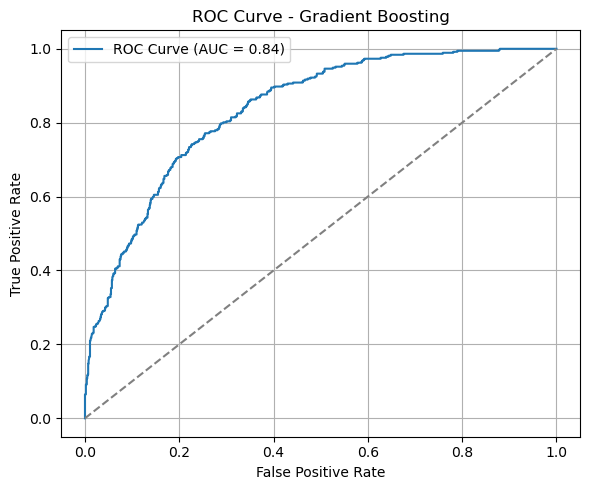

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
import shap

# Fit model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_bal, y_train_bal)

# SHAP explainer
explainer = shap.Explainer(gb)  # shap.TreeExplainer() juga bisa
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)
plot_confusion_matrix(gb, model_name="Gradient Boosting")
plot_roc_curve(gb, model_name="Gradient Boosting")
